In [1]:
import numpy as np
import classy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# PAD: 2025_04_17_PL_PlanckACTDESIDR2_w0wa_Om
w0_PAD2      =   np.array([    -1.0,    -0.9,    -0.8,    -0.7,    -0.6,    -0.5,    -0.4,    -0.3,    -0.2,    -0.1,     0.0,     0.1,     0.2,     0.3])
chi2_w0_PAD2 = 2*np.array([ 1398.66, 1397.41, 1396.45, 1395.81, 1395.43, 1395.24, 1395.32, 1395.49, 1395.86, 1396.36, 1397.00, 1397.76, 1398.62, 1399.57])

Om_PAD_LCDM      =   np.array([  0.280,   0.285,   0.290,  0.2925,   0.295,  0.2975,   0.300,  0.3025,   0.305,  0.3075,   0.310,   0.315,   0.320,   0.325])
chi2_Om_PAD_LCDM = 2*np.array([1417.07, 1409.74, 1404.55, 1402.74, 1401.36, 1400.50, 1400.11, 1400.18, 1400.65, 1401.58, 1402.94, 1406.88, 1412.42, 1419.46])

chi2_LCDM_bf = 2*1400.07

sort = np.argsort(chi2_w0_PAD2)
sort_LCDM = np.argsort(chi2_Om_PAD_LCDM)

In [3]:
# Load parameters and Class
parameters = [np.loadtxt(f'bestfit/2025_03_24_PL_PlanckACTDESIDR2_w0_{w0:.1f}.bestfit') for w0 in w0_PAD2]
N = len(parameters)
parameters_LCDM = [np.loadtxt(f'bestfit/2025_05_10_PL_PlanckACTDESI_LCDM_Om_{Om:.4f}.bestfit') for Om in Om_PAD_LCDM]
N_LCDM = len(parameters_LCDM)
parameters_bf_LCDM = np.loadtxt(f'bestfit/2025_05_27_GLOBMIN_PlanckACTDESI_LCDM.bestfit')

In [4]:
# Fonts
plt.rc('font',**{'family':'Helvetica','size':16})
plt.rc('text', usetex=True)
font = {'family':'Helvetica',
        'color' : 'black',
        'size'  :  16}

In [5]:
DESI_sigma  = np.sqrt(np.diag(np.loadtxt('DESI/desi_gaussian_bao_ALL_GCcomb_cov.txt')))
DESI_mean = np.loadtxt('DESI/desi_gaussian_bao_ALL_GCcomb_mean.txt')
DESI_DM       =  DESI_mean[[1,3,5,7, 9,12]]
DESI_sigma_DM = DESI_sigma[[1,3,5,7, 9,12]]
DESI_DH       =  DESI_mean[[2,4,6,8,10,11]]
DESI_sigma_DH = DESI_sigma[[2,4,6,8,10,11]]
zs_DESI       =  DESI_mean[[2,4,6,8,10,11]].T[0]

In [6]:
N_zs = 100
zs = np.linspace(1e-4, 3, N_zs)

In [7]:
# Compute CPL cosmologies
DA_z, DH_z = np.zeros((N, N_zs)), np.zeros((N, N_zs))
rds = np.zeros(N)

for i in range(N):
   
    cosmo = classy.Class()

    # Define cosmology                                                                                                                                                                                                                                                                                                                                                              
    params = {
        #LCDM parameters     
        'omega_b': parameters[i][0],
        'omega_cdm': parameters[i][1],
        'h': parameters[i][2],
        'ln10^{10}A_s': parameters[i][3],
        'n_s': parameters[i][4],
        'tau_reio': parameters[i][5],

        #DE                                                                                                                                                                                                                                                                                                                                                                         
        'Omega_Lambda': 0,
        'w0_fld': w0_PAD2[i],
        'wa_fld': parameters[i][6]-w0_PAD2[i],

        #Neutrinos (3 deg. masses)                                                                                                                                                                                                                                                                                                                                          
        'N_ncdm': 1,
        'deg_ncdm': 1,
        'N_ur': 2.0308,
        'm_ncdm': 0.06,
        'T_ncdm': 0.71611,
    }

    # Set the parameters to Class object                                                                                                                                                                                                                                                                                                                                            
    cosmo.set(params)
                                                                                                                                                                                                                                                                                                                  
    # Compute DA, DH
    cosmo.compute()
    rds[i] = cosmo.rs_drag()
    DA_z[i] = np.array([cosmo.angular_distance(z) for z in zs])
    DH_z[i] = np.array([1./cosmo.Hubble(z) for z in zs])

In [8]:
# Compute LCDM cosmologies
DA_z_LCDM, DH_z_LCDM = np.zeros((N_LCDM, N_zs)), np.zeros((N_LCDM, N_zs))
rds_LCDM = np.zeros(N)

for i in range(N_LCDM):
   
    cosmo = classy.Class()

    # Define cosmology                                                                                                                                                                                                                                                                                                                                                              
    params = {
        #LCDM parameters     
        'omega_cdm': Om_PAD_LCDM[i]*parameters_LCDM[i][1]**2 - parameters_LCDM[i][0],
        'omega_b': parameters_LCDM[i][0],
        'h': parameters_LCDM[i][1],
        'ln10^{10}A_s': parameters_LCDM[i][2],
        'n_s': parameters_LCDM[i][3],
        'tau_reio': parameters_LCDM[i][4],

        #Neutrinos (3 deg. masses)                                                                                                                                                                                                                                                                                                                                          
        'N_ncdm': 1,
        'deg_ncdm': 3,
        'N_ur': 0.00441,
        'm_ncdm': 0.02,
        'T_ncdm': 0.71611,
    }

    # Set the parameters to Class object                                                                                                                                                                                                                                                                                                                                            
    cosmo.set(params)
                                                                                                                                                                                                                                                                                                                  
    # Compute DA, DH
    cosmo.compute()
    rds_LCDM[i] = cosmo.rs_drag()
    DA_z_LCDM[i] = np.array([cosmo.angular_distance(z) for z in zs])
    DH_z_LCDM[i] = np.array([1./cosmo.Hubble(z) for z in zs])

In [9]:
# Compute LCDM bestfit
cosmo = classy.Class()

# Define cosmology                                                                                                                                                                                                                                                                                                                                                              
params = {
        #LCDM parameters     
        'omega_b': parameters_bf_LCDM[0],
        'omega_cdm': parameters_bf_LCDM[1],
        'h': parameters_bf_LCDM[2],
        'ln10^{10}A_s': parameters_bf_LCDM[3],
        'n_s': parameters_bf_LCDM[4],
        'tau_reio': parameters_bf_LCDM[5],

        #Neutrinos (3 deg. masses)                                                                                                                                                                                                                                                                                                                                          
        'N_ncdm': 1,
        'deg_ncdm': 3,
        'N_ur': 0.00441,
        'm_ncdm': 0.02,
        'T_ncdm': 0.71611,}

# Set the parameters to Class object                                                                                                                                                                                                                                                                                                                                            
cosmo.set(params)
                                                                                                                                                                                                                                                                                                                  
# Compute DA, DH
cosmo.compute()
rds_bf_LCDM = cosmo.rs_drag()
DA_over_rd_bf_LCDM = np.array([cosmo.angular_distance(z)/cosmo.rs_drag() for z in zs])
DH_over_rd_bf_LCDM = np.array([1./cosmo.Hubble(z)/cosmo.rs_drag() for z in zs])

DA_over_rd_DESIzs_LCDM = np.array([cosmo.angular_distance(z)/cosmo.rs_drag() for z in zs_DESI])
DH_over_rd_DESIzs_LCDM = np.array([1./cosmo.Hubble(z)/cosmo.rs_drag() for z in zs_DESI])

In [10]:
# Compute Planck 2018 bestfit: Tab. 1 (Plik best fit) https://arxiv.org/pdf/1807.06209
cosmo = classy.Class()

# Define cosmology                                                                                                                                                                                                                                                                                                                                                              
params = {
        #LCDM parameters     
        'omega_b': 0.022383,
        'omega_cdm': 0.12011,
        'h': 67.32/100.,
        'ln10^{10}A_s': 3.0448,
        'n_s': 0.96605,
        'tau_reio': 0.0543 ,

        #Neutrinos (3 deg. masses)                                                                                                                                                                                                                                                                                                                                          
        'N_ncdm': 1,
        'deg_ncdm': 3,
        'N_ur': 0.00441,
        'm_ncdm': 0.02,
        'T_ncdm': 0.71611,}

# Set the parameters to Class object                                                                                                                                                                                                                                                                                                                                            
cosmo.set(params)
                                                                                                                                                                                                                                                                                                                  
# Compute DA, DH
cosmo.compute()
rds_bf_Planck = cosmo.rs_drag()
DA_over_rd_bf_Planck = np.array([cosmo.angular_distance(z)/cosmo.rs_drag() for z in zs])
DH_over_rd_bf_Planck = np.array([1./cosmo.Hubble(z)/cosmo.rs_drag() for z in zs])

DA_over_rd_DESIzs_Planck = np.array([cosmo.angular_distance(z)/cosmo.rs_drag() for z in zs_DESI])
DH_over_rd_DESIzs_Planck = np.array([1./cosmo.Hubble(z)/cosmo.rs_drag() for z in zs_DESI])


# $D_A$

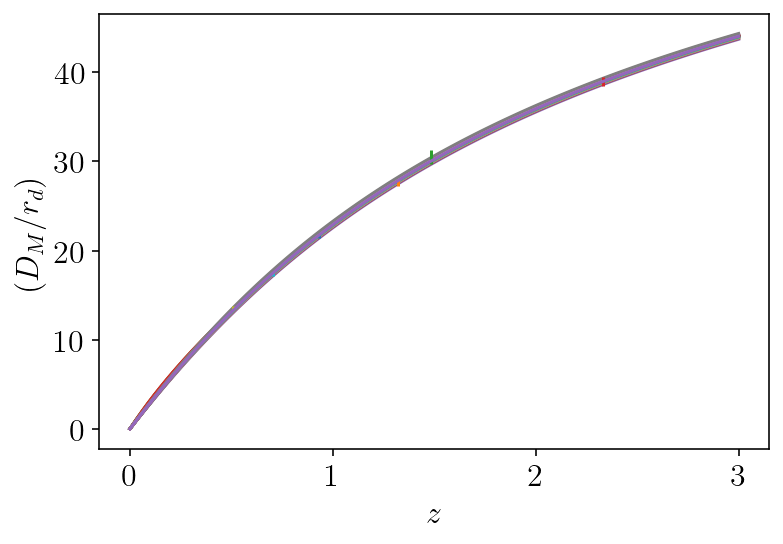

In [11]:
for i in range(N):
    plt.plot(zs, DA_z[i]*(1+zs)/rds[i])
for i in range(N_LCDM):
    plt.plot(zs, DA_z_LCDM[i]*(1+zs)/rds_LCDM[i])
for n in range(len(DESI_DM)):
    plt.errorbar(DESI_DM[n][0], DESI_DM[n][1], DESI_sigma_DM[n], ls="")
plt.plot(zs, DA_over_rd_bf_LCDM*(1+zs))
plt.ylabel(r"$(D_M/r_d)$")
plt.xlabel(r"$z$")
plt.xlabel(r"$z$")
plt.show()

# $D_H$

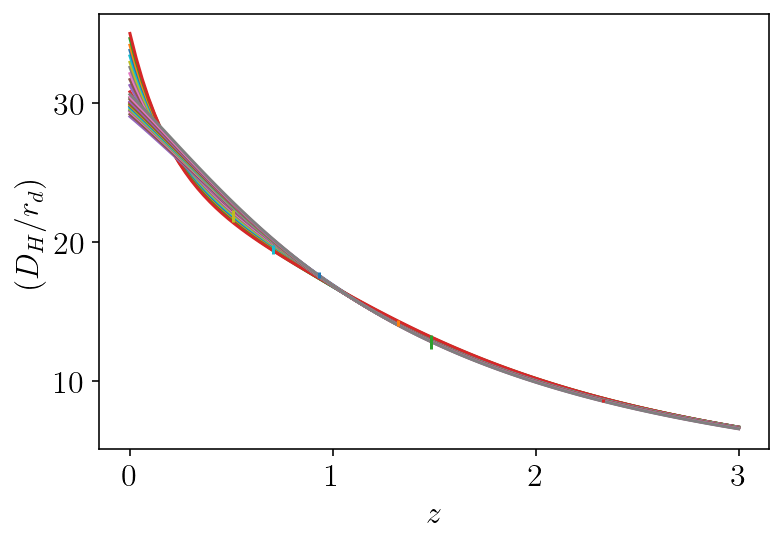

In [12]:
for i in range(N):
    plt.plot(zs, DH_z[i]/rds[i])
for i in range(N_LCDM):
    plt.plot(zs, DH_z_LCDM[i]/rds[i])
for n in range(len(DESI_DM)):
    plt.errorbar(DESI_DH[n][0], DESI_DH[n][1], DESI_sigma_DH[n], ls="")
plt.ylabel(r"$(D_H/r_d)$")
plt.xlabel(r"$z$")
plt.show()

# Combined plot

1.0220098133261721
1.0220012238137344


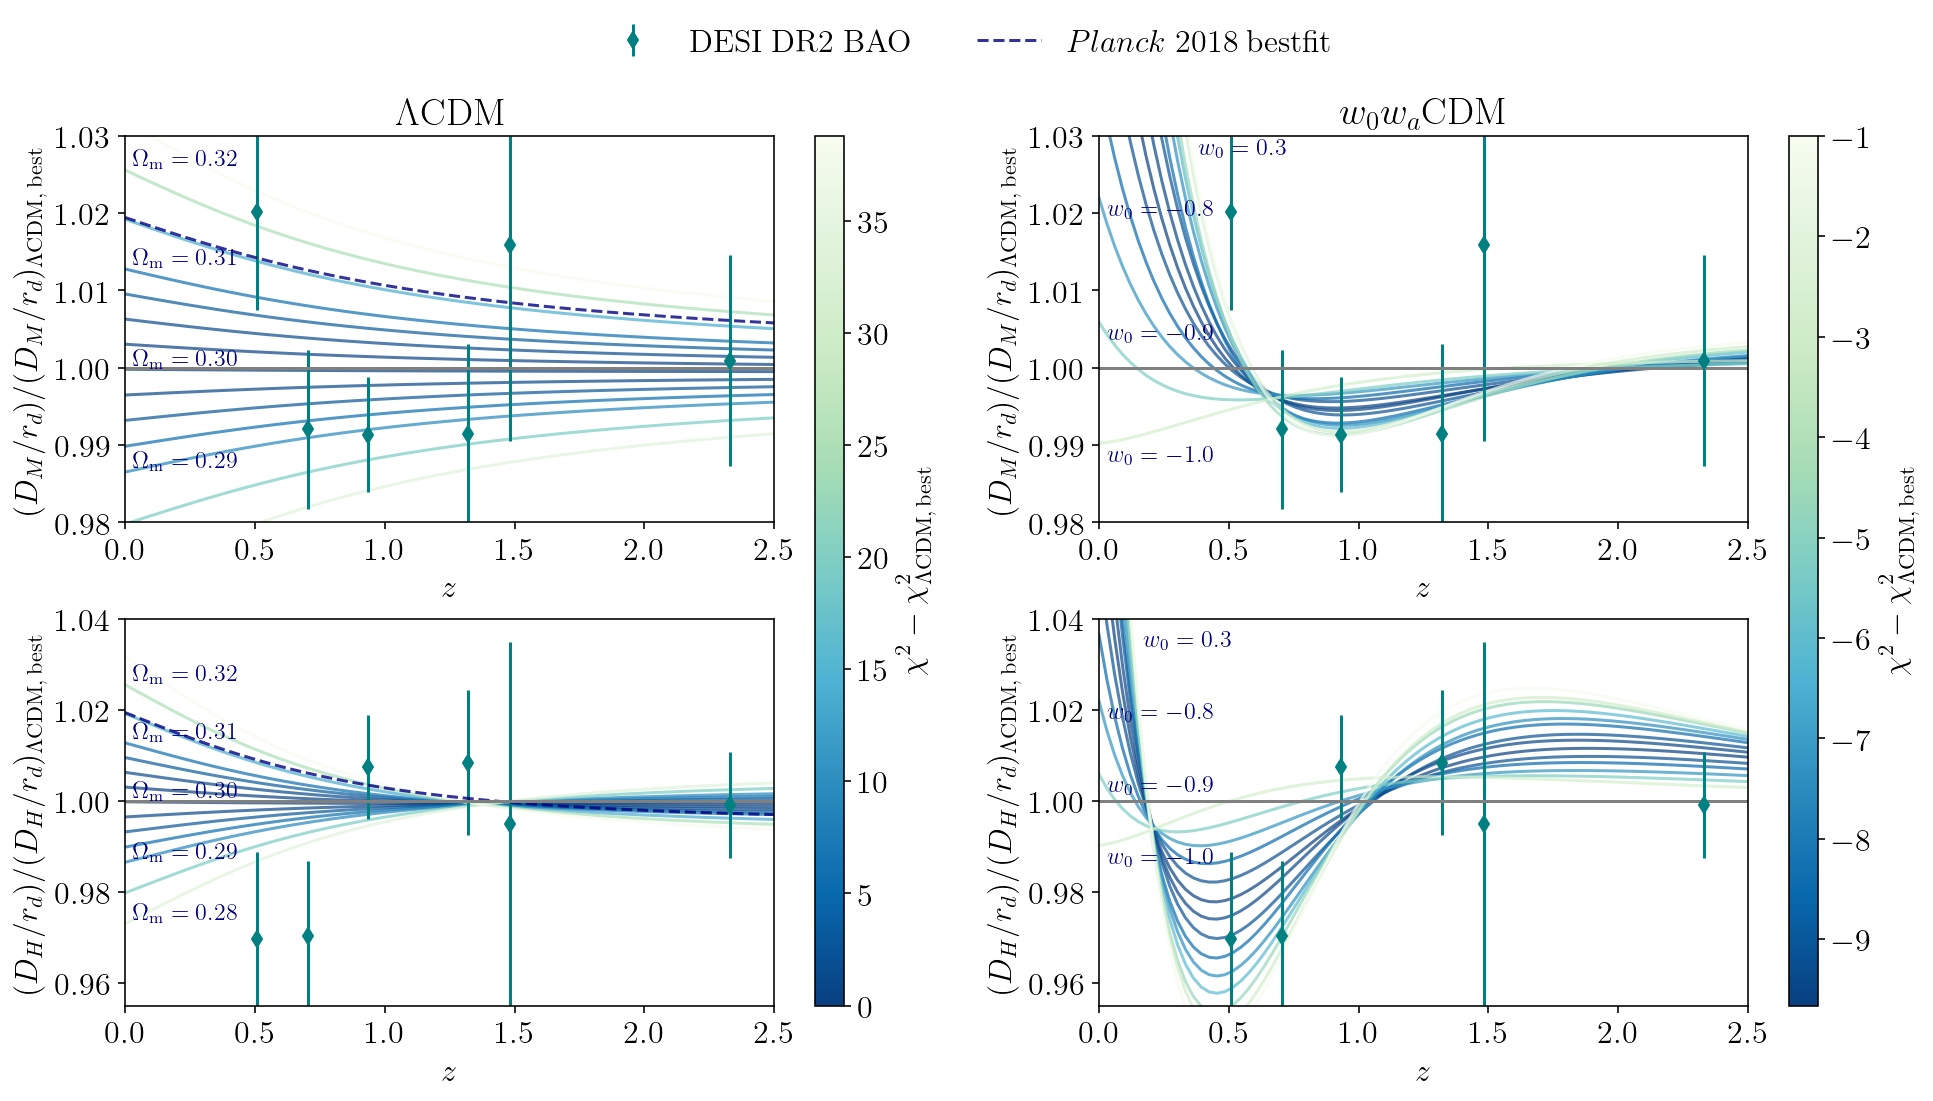

In [13]:
# Common settings
alpha = 0.7
color_Planck = "navy"
color_annot  = "navy"
annot_font   = 12
lss_Planck = "--"
fig, ax = plt.subplots(2, 2, figsize=(16, 8), sharex='col')
plt.subplots_adjust(hspace=0.25)

# LCDM settings
delta_chi2 = chi2_Om_PAD_LCDM[sort_LCDM] - chi2_LCDM_bf
vmin, vmax = np.min(delta_chi2), np.max(delta_chi2)
cmap = plt.get_cmap('GnBu').reversed()
norm = plt.Normalize(vmin=0, vmax=vmax)
colors = cmap(norm(delta_chi2))
newcmp = ListedColormap(colors)

# ax[0,0]

for i in range(N_LCDM):
    ax[0,0].plot(zs, DA_z_LCDM[sort_LCDM][i]*(1+zs)/rds_LCDM[sort_LCDM][i]/(DA_over_rd_bf_LCDM*(1+zs)), color=colors[i], alpha=alpha)
    if i in [2, 6, 10, 12, 14]:  # For every second line
        y_pos = DA_z_LCDM[i][0]*(1+zs[0])/rds_LCDM[i]/(DA_over_rd_bf_LCDM[0]*(1+zs[0]))
        ax[0,0].text(zs[1], y_pos, f"$\\Omega_\\mathrm{{m}} = {Om_PAD_LCDM[i]:.2f}$", fontsize=annot_font, verticalalignment='bottom', color=color_annot)
ax[0,0].errorbar(DESI_DM[0][0], DESI_DM[0][1]/(DA_over_rd_DESIzs_LCDM[0]*(1+zs_DESI[0])), DESI_sigma_DM[0]/(DA_over_rd_DESIzs_LCDM[0]*(1+zs_DESI[0])), ls="", marker="d", color="teal", label=r"$\mathrm{DESI\ DR2\ BAO}$")
for n in range(1, len(DESI_DM)):
    ax[0,0].errorbar(DESI_DM[n][0], DESI_DM[n][1]/(DA_over_rd_DESIzs_LCDM[n]*(1+zs_DESI[n])), DESI_sigma_DM[n]/(DA_over_rd_DESIzs_LCDM[n]*(1+zs_DESI[n])), ls="", marker="d", color="teal")
ax[0,0].plot(zs, DA_over_rd_bf_Planck*(1+zs)/(DA_over_rd_bf_LCDM*(1+zs)), color=color_Planck, ls=lss_Planck, alpha=0.8, label=r"$Planck\ 2018\ \mathrm{bestfit}$")        
ax[0,0].axhline(1, color="gray")

cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=[ax[0,0], ax[1,0]], location='right', aspect=30)
cbar.set_label(r"$\chi^2 - \chi^2_{\Lambda\mathrm{CDM,\, best}}$")
ax[0,0].set_title(r"$\Lambda\mathrm{CDM}$")
ax[0,0].set_ylabel(r"$(D_M/r_d)/(D_M/r_d)_{\Lambda\mathrm{CDM,\, best}}$")
ax[0,0].set_ylim(0.98, 1.03)
ax[0,0].set_xlim(0,2.5)
ax[0,0].set_xlabel(r"$z$")

# ax[1,0]

for i in range(N_LCDM):
    ax[1,0].plot(zs, DH_z_LCDM[sort_LCDM][i]/rds_LCDM[sort_LCDM][i]/DH_over_rd_bf_LCDM, color=colors[i], alpha=alpha)
    if i in [0, 2, 6, 10, 12, 14]:  # For every second line
        y_pos = DH_z_LCDM[i][0]/rds_LCDM[i]/(DH_over_rd_bf_LCDM[0])
        ax[1,0].text(zs[1], y_pos, f"$\\Omega_\\mathrm{{m}} = {Om_PAD_LCDM[i]:.2f}$", fontsize=annot_font, verticalalignment='bottom', color=color_annot)

for n in range(len(DESI_DM)):
    ax[1,0].errorbar(DESI_DH[n][0], DESI_DH[n][1]/DH_over_rd_DESIzs_LCDM[n], DESI_sigma_DH[n]/DH_over_rd_DESIzs_LCDM[n], ls="", marker="d", color="teal")
ax[1,0].plot(zs, DH_over_rd_bf_Planck/(DH_over_rd_bf_LCDM), color=color_Planck, ls=lss_Planck, alpha=0.8)        
ax[1,0].axhline(1, color="gray")
ax[1,0].set_ylabel(r"$(D_H/r_d)/(D_H/r_d)_{\Lambda\mathrm{CDM,\, best}}$")
ax[1,0].set_xlabel(r"$z$")
ax[1,0].set_ylim(0.955, 1.04)
ax[1,0].set_xlim(0,2.5)

# w0wa settings

delta_chi2 = chi2_w0_PAD2[sort] - chi2_LCDM_bf
vmin, vmax = np.min(delta_chi2), np.max(delta_chi2)
cmap = plt.get_cmap('GnBu').reversed()
norm = plt.Normalize(vmin=vmin, vmax=vmax)
colors = cmap(norm(delta_chi2))
newcmp = ListedColormap(colors)

# ax[0,1]

for i in range(N):
    ax[0,1].plot(zs, DA_z[sort][i]*(1+zs)/rds[sort][i]/(DA_over_rd_bf_LCDM*(1+zs)), color=colors[i], alpha=alpha)
    if i in [0, 1, 2]:  
        y_pos = DA_z[i][0]*(1+zs[0])/rds[i]/(DA_over_rd_bf_LCDM[0]*(1+zs[0]))
        ax[0,1].text(zs[1], y_pos, f"$w_0 = {w0_PAD2[i]:.1f}$", fontsize=annot_font, verticalalignment='top', color=color_annot)
    if i==N-1:  
        print(y_pos)
        ax[0,1].text(0.38, 1.027, f"$w_0 = {w0_PAD2[i]:.1f}$", fontsize=annot_font, verticalalignment='bottom', color=color_annot)
ax[0,1].errorbar(DESI_DM[0][0], DESI_DM[0][1]/(DA_over_rd_DESIzs_LCDM[0]*(1+zs_DESI[0])), DESI_sigma_DM[0]/(DA_over_rd_DESIzs_LCDM[0]*(1+zs_DESI[0])), ls="", marker="d", color="teal", label=r"$\mathrm{DESI\ DR2\ BAO}$")
for n in range(1, len(DESI_DM)):
    ax[0,1].errorbar(DESI_DM[n][0], DESI_DM[n][1]/(DA_over_rd_DESIzs_LCDM[n]*(1+zs_DESI[n])), DESI_sigma_DM[n]/(DA_over_rd_DESIzs_LCDM[n]*(1+zs_DESI[n])), ls="", marker="d", color="teal")
ax[0,1].axhline(1, color="gray")

cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=[ax[0,1], ax[1,1]], location='right', aspect=30)
cbar.set_label(r"$\chi^2 - \chi^2_{\Lambda\mathrm{CDM,\, best}}$")
ax[0,1].set_title(r"$w_0 w_a\mathrm{CDM}$")
ax[0,1].set_xlabel(r"$z$")
ax[0,1].set_ylabel(r"$(D_M/r_d)/(D_M/r_d)_{\Lambda\mathrm{CDM,\, best}}$")
ax[0,1].set_ylim(0.98, 1.03)
ax[0,1].set_xlim(0,2.5)

# ax[1,1]

for i in range(N):
    ax[1,1].plot(zs, DH_z[sort][i]/rds[sort][i]/DH_over_rd_bf_LCDM, color=colors[i], alpha=alpha)
    if i in [0, 1, 2]:  
        y_pos = DH_z[i][0]/rds[i]/(DH_over_rd_bf_LCDM[0])
        ax[1,1].text(zs[1], y_pos, f"$w_0 = {w0_PAD2[i]:.1f}$", fontsize=annot_font, verticalalignment='top', color=color_annot)
    if i==N-1:  
        print(y_pos)
        ax[1,1].text(0.17, 1.033, f"$w_0 = {w0_PAD2[i]:.1f}$", fontsize=annot_font, verticalalignment='bottom', color=color_annot)

for n in range(len(DESI_DM)):
    ax[1,1].errorbar(DESI_DH[n][0], DESI_DH[n][1]/DH_over_rd_DESIzs_LCDM[n], DESI_sigma_DH[n]/DH_over_rd_DESIzs_LCDM[n], ls="", marker="d", color="teal")
ax[1,1].axhline(1, color="gray")

ax[1,1].set_ylabel(r"$(D_H/r_d)/(D_H/r_d)_{\Lambda\mathrm{CDM,\, best}}$")
ax[1,1].set_xlabel(r"$z$")
ax[1,1].set_ylim(0.955, 1.04)
ax[1,1].set_xlim(0,2.5)

# Ensure x-tick labels are shown on top plots
ax[0,0].tick_params(axis='x', labelbottom=True)
ax[0,1].tick_params(axis='x', labelbottom=True)

# Add legends above the plots
handles, labels = ax[0,0].get_legend_handles_labels()

# Reorder handles and labels to have markers first
handles = [handles[1], handles[0]]
labels = [labels[1], labels[0]]
fig.legend(handles, labels, loc='upper center', ncol=2, frameon=False)

#plt.savefig("spaghetti.pdf", bbox_inches='tight')
plt.show()